### Import

In [5]:
from collections import defaultdict

import networkx as nx
from node2vec import Node2Vec
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, f1_score, r2_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mj.utils import NODE2VEC_SEED, count_occurences, average_counts
from sklearn.neural_network import MLPRegressor

In [6]:
months = ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30']
graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2015-01-31: [('AFG', 'PAK'), ('AFG', 'USA'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'USA'), ('AFR', 'ZAF'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM', 'BGR'), ('AUS', 'USA'), ('BFA', 'CIV'), ('BGD', 'IND'), ('BGD', 'USA'), ('BGR', 'FRA'), ('BLR', 'USA'), ('BLZ', 'ESP'), ('BLZ', 'USA'), ('BRA', 'IDN'), ('CAN', 'CHN'), ('CAN', 'SAU'), ('CAN', 'SEA'), ('CAN', 'UKR'), ('CAN', 'USA'), ('CHE', 'SGP'), ('CHE', 'USA'), ('CHL', 'USA'), ('CHN', 'CMR'), ('CHN', 'COL'), ('CHN', 'EGY'), ('CHN', 'JPN'), ('CHN', 'KOR'), ('CHN', 'PAK'), ('CHN', 'RUS'), ('CHN', 'SEA'), ('CHN', 'TWN'), ('CHN', 'USA'), ('COD', 'COG'), ('COD', 'USA'), ('COK', 'USA'), ('COL', 'USA'), ('CUB', 'FRA'), ('CUB', 'NMR'), ('CUB', 'USA'), ('CUB', 'ZAF'), ('DEU', 'EUR'), ('DEU', 'MDV'), ('DEU', 'POL'), ('DEU', 'RUS'), ('DEU', 'SGP'), ('DEU', 'SYR'), ('DEU', 'USA'), ('ECU', 'SWE'), ('EGY', 'GMB'), ('EGY', 'MYS'), ('EGY', 'USA'), ('ERI', 'ISR'), ('ESP', 'KOR'), ('ESP', 'USA'), ('ESP',

In [3]:
graphs

In [4]:
january_node2vec = Node2Vec(graphs[0], dimensions=64, walk_length=30, num_walks=100, seed=1723123209)
january_model = january_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 141.56it/s]


In [5]:
february_node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=30, num_walks=100, seed=1723123209)
february_model = february_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:02<00:00, 44.99it/s]


In [6]:
march_node2vec = Node2Vec(graphs[2], dimensions=64, walk_length=30, num_walks=100, seed=1723123209)
march_model = march_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:02<00:00, 33.79it/s]


In [7]:
april_node2vec = Node2Vec(graphs[3], dimensions=64, walk_length=30, num_walks=100, seed=1723123209)
april_model = april_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:02<00:00, 34.30it/s]


In [8]:
april_node2vec.walks

[['JOR',
  'DJI',
  'SAU',
  'AZE',
  'MKD',
  'AUT',
  'MKD',
  'ITA',
  'WST',
  'BRA',
  'CHL',
  'BRA',
  'CHN',
  'LAO',
  'VNM',
  'HUN',
  'UKR',
  'ITA',
  'PSE',
  'MEX',
  'CHN',
  'KEN',
  'VAT',
  'PSE',
  'ZAF',
  'VNM',
  'VEN',
  'KNA',
  'VEN',
  'KNA'],
 ['ATG',
  'USA',
  'EAF',
  'USA',
  'DEU',
  'SAU',
  'CAN',
  'GRD',
  'NZL',
  'WSM',
  'SEA',
  'TMP',
  'SEA',
  'SLV',
  'CRI',
  'SLV',
  'CRI',
  'VEN',
  'MEX',
  'FRA',
  'FJI',
  'BEL',
  'ARE',
  'BHR',
  'USA',
  'ARE',
  'BHR',
  'EGY',
  'GHA',
  'SAU'],
 ['NAF'],
 ['SHN'],
 ['AUS',
  'PAK',
  'ZAF',
  'WAF',
  'NGA',
  'CHN',
  'BGD',
  'NZL',
  'CAN',
  'ASA',
  'PHL',
  'YEM',
  'IRL',
  'CYP',
  'CHN',
  'AFG',
  'ARE',
  'TUR',
  'KAZ',
  'FRA',
  'SRB',
  'FRA',
  'SRB',
  'POL',
  'MDV',
  'TUR',
  'QAT',
  'PRK',
  'ZWE',
  'PRK'],
 ['KWT',
  'ALB',
  'DEU',
  'LTU',
  'ISR',
  'HUN',
  'UKR',
  'CAN',
  'CUB',
  'JPN',
  'VAT',
  'COL',
  'IRN',
  'KWT',
  'LBN',
  'EGY',
  'BFA',
  'FRA',
  'ME

In [9]:
print(len(graphs[0].nodes) == len(graphs[1].nodes) == len(graphs[2].nodes) == len(graphs[3].nodes))

True


In [10]:
ser1 = pd.Series([n for n in graphs[0].nodes])
ser2 = pd.Series([n for n in graphs[1].nodes])
ser3 = pd.Series([n for n in graphs[2].nodes])
ser4 = pd.Series([n for n in graphs[3].nodes])
intersection_set = set(ser1).intersection(set(ser2)).intersection(set(ser3)).intersection(set(ser4))

In [11]:
intersection_set

{'ABW',
 'AFG',
 'AFR',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASA',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CAS',
 'CAU',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRB',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAF',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAM',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [12]:
avg_vectors = dict()
for node in graphs[3].nodes:
    avg_vector = []
    for i in range(64):
        avg_vector.append((january_model.wv[node][i] + february_model.wv[node][i] + march_model.wv[node][i] + april_model.wv[node][i]) / 4)
    avg_vectors[node] = avg_vector

In [13]:
graphs[0].nodes


NodeView(('ABW', 'AFG', 'AFR', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASA', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CAS', 'CAU', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRB', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAF', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUR', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAM', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEA', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAF', 'NAM', 'NER', 'NG

In [14]:
january_model.wv['USA']

array([ 4.0665454e-01, -4.4969130e-02,  4.6415356e-01, -1.6500337e-01,
        1.8688303e-01, -3.6072579e-01, -3.1763021e-02, -4.2756495e-01,
       -1.9257769e-01, -1.8087273e-02,  1.2676786e-01,  2.4938863e-04,
       -1.3885230e-01, -7.9848200e-02,  2.6221651e-01,  9.5800705e-02,
        2.4061161e-01,  1.9797063e-02, -2.4124363e-01,  3.3943948e-01,
        1.6456471e-01,  2.1083729e-01,  2.2601445e-01, -4.1739526e-01,
       -3.6123693e-02,  4.5395198e-01, -4.6860826e-01,  1.9274165e-01,
       -1.1680529e-01, -3.2694779e-02, -4.3864205e-02,  3.7949931e-04,
       -3.4448579e-01,  9.5749930e-02,  1.6300887e-02, -3.0855921e-01,
       -6.1950552e-01,  1.6847818e-01,  1.5856169e-01, -1.5838441e-01,
       -6.6871300e-02,  1.3911349e-01, -1.6922004e-05, -2.0426753e-01,
       -1.2729457e-01, -3.6970049e-01,  3.9200580e-01, -1.4299296e-01,
       -2.5682893e-01, -3.7807673e-01,  1.6434532e-01, -2.2976956e-01,
        4.1588339e-01,  6.0348958e-01, -1.4724042e-01, -5.6046218e-02,
      

In [15]:
len(avg_vectors['USA'])

64

### Scalar product of two vectors for link prediction

In [16]:
dot_products = dict()
for node1 in avg_vectors:
    for node2 in avg_vectors:
        if node1 != node2:
            vector1 = np.array(avg_vectors[node1])
            vector2 = np.array(avg_vectors[node2])
            n_sorted = sorted([node1, node2])
            dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = np.dot(vector1, vector2)

In [17]:
dot_products

{'ABW-AFG': 0.009044926330863023,
 'ABW-AFR': 0.009951856326864999,
 'ABW-AGO': 0.006976839793010706,
 'ABW-AIA': 0.001360768982273688,
 'ABW-ALB': -0.00030537744044026966,
 'ABW-AND': -0.0013238945257135967,
 'ABW-ARE': 0.015810026810526106,
 'ABW-ARG': 0.005103970723783147,
 'ABW-ARM': 0.010083488203372338,
 'ABW-ASA': 0.0024165729470394864,
 'ABW-ATG': 0.0038384833224581784,
 'ABW-AUS': 0.01545850806780354,
 'ABW-AUT': -0.0017439548610974514,
 'ABW-AZE': 0.001096602534885889,
 'ABW-BDI': 0.014475555888791961,
 'ABW-BEL': -0.00035002081401824684,
 'ABW-BEN': 0.0009834410475143725,
 'ABW-BFA': 0.018591920371721287,
 'ABW-BGD': 0.00334268445721144,
 'ABW-BGR': 0.015878738182086828,
 'ABW-BHR': 0.00801948271122366,
 'ABW-BHS': -0.000259298721169443,
 'ABW-BLR': 0.008710674208978034,
 'ABW-BLZ': 0.0072851040847969,
 'ABW-BMU': 0.001624900803205963,
 'ABW-BOL': 0.0025223827381823435,
 'ABW-BRA': 0.007763235555530759,
 'ABW-BRB': 0.004314261041663708,
 'ABW-BRN': 0.005727872374952399,
 'AB

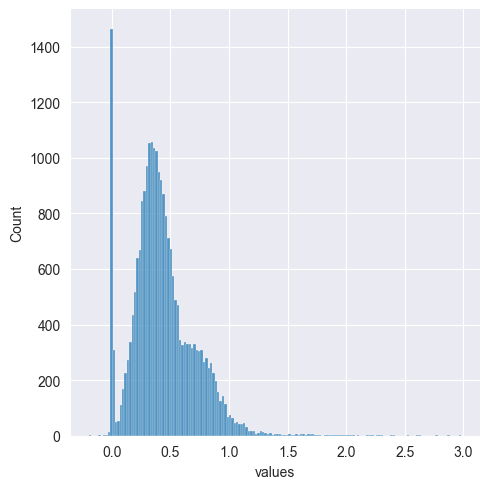

In [18]:
sns.displot(pd.DataFrame({'values':dot_products.values()}), x='values')

### Testing with different values of threshold

In [7]:
with open(f'../data/graphs/graph_2015-05-31.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(g.edges(data=True))

[('ABW', 'NLD', {'weight': 0.32994957983193246}), ('ABW', 'USA', {'weight': 5.517460317460318}), ('AFG', 'ARE', {'weight': -7.074291938997822}), ('AFG', 'AUS', {'weight': -2.72696614925925}), ('AFG', 'BRA', {'weight': -7.4195652173913045}), ('AFG', 'CAN', {'weight': 0.3140187736037181}), ('AFG', 'CAS', {'weight': 5.007946154621764}), ('AFG', 'CHN', {'weight': 1.4252879298751775}), ('AFG', 'DEU', {'weight': 2.729558020672221}), ('AFG', 'EGY', {'weight': -1.7264969559745413}), ('AFG', 'EUR', {'weight': -5.204718808983901}), ('AFG', 'FRA', {'weight': -2.489670234468934}), ('AFG', 'GBR', {'weight': -5.47716092757292}), ('AFG', 'HRV', {'weight': 1.611537308042588}), ('AFG', 'IDN', {'weight': 0.38000000000000006}), ('AFG', 'IND', {'weight': 1.3917199017199018}), ('AFG', 'IRN', {'weight': 0.08018590996540487}), ('AFG', 'ITA', {'weight': 1.251977401129944}), ('AFG', 'JOR', {'weight': 1.664864864864866}), ('AFG', 'JPN', {'weight': -8.0}), ('AFG', 'KAZ', {'weight': 1.2743687280737526}), ('AFG', 

In [20]:
actual_and_predicted_values = dict()
for edge in g.edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in dot_products:
        # threshold = 0.1
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] >= 0 else 0, dot_products[e])

In [21]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
'''recall = recall_score(actual, predicted)
acc = accuracy_score(actual, predicted)
print('Recall:', recall, 'Accuracy:', acc)'''

"recall = recall_score(actual, predicted)\nacc = accuracy_score(actual, predicted)\nprint('Recall:', recall, 'Accuracy:', acc)"

In [22]:
print(len(actual))

2467


In [23]:
print(len([el for el in actual if el == 0]))
print(len([el for el in actual if el == 1]))


603
1864


In [24]:
print(len([el for el in predicted if el == 0]))
print(len([el for el in predicted if el == 1]))

0
0


In [25]:
X = predicted
y = actual
len(X) == len(y)
    

True

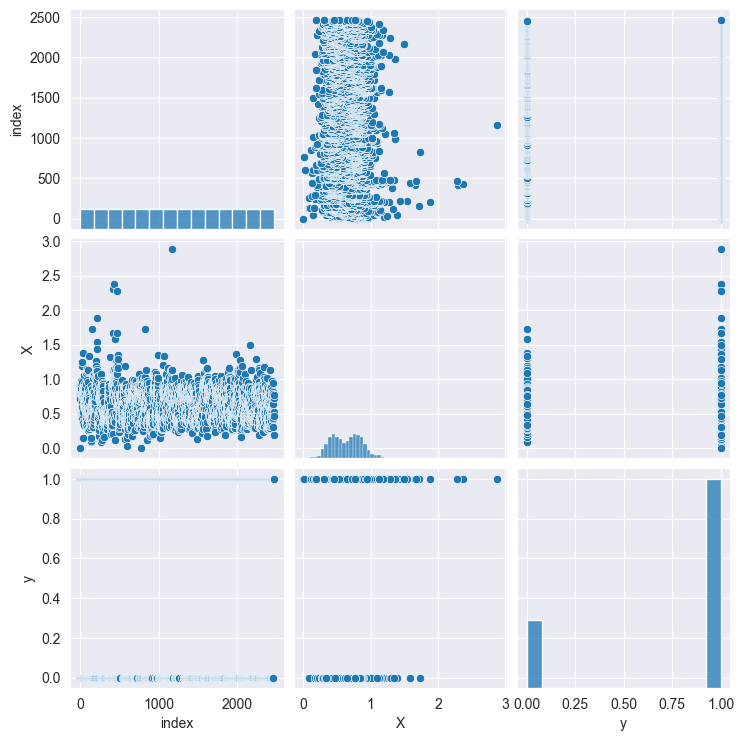

In [26]:
data = pd.DataFrame({'X': X, 'y': y}).reset_index()
sns.pairplot(data)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.3, random_state=42)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7773279352226721


In [29]:
print('Recall', recall_score(y_test, predictions))

Recall 1.0


In [30]:
print('F1-score', f1_score(y_test, predictions))

F1-score 0.8747152619589977


# Experiment with Node2Vec parameteres

In [8]:
w_length, n_walks = 5, 20
# we are using the same seed for reproducibility
j_nv = Node2Vec(graphs[0], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
j_model = j_nv.fit(window=10, min_count=1, batch_words=4)
f_nv = Node2Vec(graphs[1], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
f_model = f_nv.fit(window=10, min_count=1, batch_words=4)
m_nv = Node2Vec(graphs[2], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
m_model = m_nv.fit(window=10, min_count=1, batch_words=4)
a_nv = Node2Vec(graphs[3], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
a_model = a_nv.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 364.88it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 119.61it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 122.86it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 154.20it/s]


In [9]:
n_vecs = [j_nv, f_nv, m_nv, a_nv]
nv_models = [j_model, f_model, m_model, a_model]

In [10]:
nodes = graphs[0].nodes

In [11]:
nodes_enc = {node: idx for idx, node in enumerate(nodes)}

In [12]:
nodes_enc

{'ABW': 0,
 'AFG': 1,
 'AFR': 2,
 'AGO': 3,
 'AIA': 4,
 'ALB': 5,
 'AND': 6,
 'ARE': 7,
 'ARG': 8,
 'ARM': 9,
 'ASA': 10,
 'ATG': 11,
 'AUS': 12,
 'AUT': 13,
 'AZE': 14,
 'BDI': 15,
 'BEL': 16,
 'BEN': 17,
 'BFA': 18,
 'BGD': 19,
 'BGR': 20,
 'BHR': 21,
 'BHS': 22,
 'BLR': 23,
 'BLZ': 24,
 'BMU': 25,
 'BOL': 26,
 'BRA': 27,
 'BRB': 28,
 'BRN': 29,
 'BTN': 30,
 'BWA': 31,
 'CAF': 32,
 'CAN': 33,
 'CAS': 34,
 'CAU': 35,
 'CHE': 36,
 'CHL': 37,
 'CHN': 38,
 'CIV': 39,
 'CMR': 40,
 'COD': 41,
 'COG': 42,
 'COK': 43,
 'COL': 44,
 'COM': 45,
 'CPV': 46,
 'CRB': 47,
 'CRI': 48,
 'CUB': 49,
 'CYM': 50,
 'CYP': 51,
 'CZE': 52,
 'DEU': 53,
 'DJI': 54,
 'DMA': 55,
 'DNK': 56,
 'DOM': 57,
 'DZA': 58,
 'EAF': 59,
 'ECU': 60,
 'EGY': 61,
 'ERI': 62,
 'ESP': 63,
 'EST': 64,
 'ETH': 65,
 'EUR': 66,
 'FIN': 67,
 'FJI': 68,
 'FRA': 69,
 'FSM': 70,
 'GAB': 71,
 'GBR': 72,
 'GEO': 73,
 'GHA': 74,
 'GIN': 75,
 'GMB': 76,
 'GNB': 77,
 'GNQ': 78,
 'GRC': 79,
 'GRD': 80,
 'GTM': 81,
 'GUY': 82,
 'HKG': 83,
 '

In [13]:
counts = count_occurences(n_vecs, nodes, nodes_enc)

In [14]:
counts[0][207]

array([0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.1 , 0.  , 0.  , 0.05, 0.  , 0.25, 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.05, 0.  , 0.  ,
       0.15, 0.  , 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  ,
       0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.05, 0.  , 0.  , 0.2 , 0.15,
       0.  , 0.35, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.

In [38]:
# appearances_per_month = {}
# months = ['jan', 'feb', 'mar', 'apr']
# for m in months:
#     appearances_per_month[m] = None
# for month, m_name in zip(n_vecs, months):
#     num_appearances = [[0 for _ in range(len(nodes_enc.keys()))] for _ in range(len(nodes_enc.keys()))]
#     for node in nodes:
#         walks = [el for el in month.walks if el[0] == node]
#         for walk in walks:
#             unique_nodes = set(walk)
#             for u_node in unique_nodes:
#                 num_appearances[nodes_enc[node]][nodes_enc[u_node]] += 1 
#         num_appearances[nodes_enc[node]] = np.array(num_appearances[nodes_enc[node]]).reshape(-1, 1)
#         scaler = MinMaxScaler()
#         num_appearances[nodes_enc[node]] = scaler.fit_transform(num_appearances[nodes_enc[node]]).reshape(1, -1)[0]
#     appearances_per_month[m_name] = num_appearances

In [15]:
averaged_counts = average_counts(counts, nodes_enc)
for node in nodes_enc:
    month_lists = [month[nodes_enc[node]] for month in counts.values()]
    averaged_counts[node] = np.mean(month_lists, axis=0)

In [16]:
averaged_counts['USA']

array([0.    , 0.0375, 0.05  , 0.    , 0.    , 0.025 , 0.    , 0.    ,
       0.    , 0.0125, 0.0125, 0.0125, 0.025 , 0.025 , 0.0125, 0.    ,
       0.    , 0.    , 0.    , 0.0125, 0.0125, 0.0375, 0.    , 0.0125,
       0.0125, 0.    , 0.    , 0.0125, 0.    , 0.05  , 0.    , 0.    ,
       0.    , 0.05  , 0.    , 0.    , 0.05  , 0.0125, 0.0625, 0.0125,
       0.025 , 0.    , 0.    , 0.    , 0.0375, 0.    , 0.    , 0.025 ,
       0.    , 0.0125, 0.    , 0.0125, 0.0125, 0.0625, 0.    , 0.0125,
       0.0125, 0.    , 0.0125, 0.0125, 0.025 , 0.125 , 0.025 , 0.0375,
       0.0375, 0.0125, 0.1125, 0.    , 0.0125, 0.0625, 0.    , 0.    ,
       0.075 , 0.    , 0.0625, 0.0125, 0.    , 0.    , 0.0125, 0.0375,
       0.    , 0.0125, 0.0125, 0.0125, 0.    , 0.    , 0.0125, 0.0375,
       0.0125, 0.    , 0.0125, 0.0875, 0.0125, 0.    , 0.0375, 0.025 ,
       0.0375, 0.075 , 0.05  , 0.025 , 0.1375, 0.    , 0.05  , 0.    ,
       0.0125, 0.0875, 0.    , 0.025 , 0.    , 0.0125, 0.0125, 0.025 ,
      

# Prediction for the fifth month by taking the median of the dot products for each month multiplied by the number of occurrence of the other country in the corresponding month

In [17]:
dot_products_per_month_weighted = dict()
for i, model in enumerate(nv_models):
    vectors = dict()
    for node in nodes:
        vectors[node] = model.wv[node]
    dot_products = dict()
    for node1 in vectors:
        for node2 in vectors:
            if node1 != node2:
                vector1 = np.array(vectors[node1])
                vector2 = np.array(vectors[node2])
                n_sorted = sorted([node1, node2])
                dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = (np.dot(vector1, vector2) * max(counts[i][nodes_enc[n_sorted[0]]][nodes_enc[n_sorted[1]]], counts[i][nodes_enc[n_sorted[1]]][nodes_enc[n_sorted[0]]])
                                                                        )
    dot_products_per_month_weighted[i] = dot_products

In [18]:
predictions = dict()
for pair in dot_products_per_month_weighted[0]:
    prediction = 0
    for month in range(len(nv_models)):
        prediction += dot_products_per_month_weighted[month][pair]
    predictions[pair] = (prediction / len(nv_models))

In [19]:
actual_and_predicted_values = dict()
for edge in graphs[4].edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in predictions:
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] > 0 else 0, predictions[e])

In [20]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]

In [21]:
df = pd.DataFrame({'actual': actual, 'predicted': predicted})

In [22]:
df.head()

,actual,predicted
0,1,0.000000
1,1,0.000000
2,0,0.228064
3,0,0.078705
4,0,0.021119


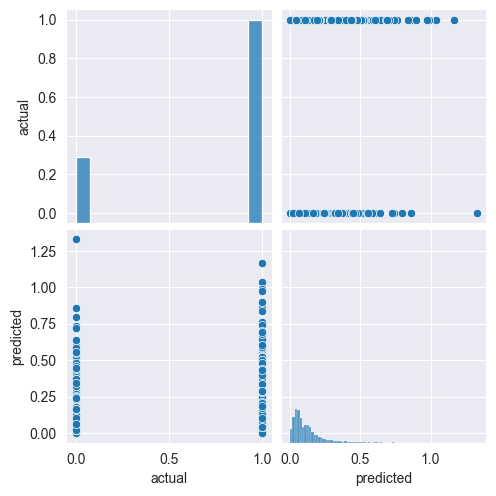

In [23]:
sns.pairplot(df)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df[['predicted']], df['actual'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_ = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_))
print('Recall: ', recall_score(y_test, predictions_))
print('F1-score: ', f1_score(y_test, predictions_))

Accuracy:  0.7813765182186235
Recall:  1.0
F1-score:  0.8772727272727273


# Multiply each node2vec vector by the occurrence rate and then calculate dot product

In [25]:
dot_products_per_month_weighted = dict()
for i, model in enumerate(nv_models):
    vectors = dict()
    for node in nodes:
        vectors[node] = model.wv[node]
    dot_products = dict()
    for node1 in vectors:
        for node2 in vectors:
            if node1 != node2:
                n_sorted = sorted([node1, node2])
                vector1 = np.array(vectors[node1]) * counts[i][nodes_enc[n_sorted[0]]][nodes_enc[n_sorted[1]]]
                vector2 = np.array(vectors[node2]) * counts[i][nodes_enc[n_sorted[1]]][nodes_enc[n_sorted[0]]]
                dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = (np.dot(vector1, vector2))
    dot_products_per_month_weighted[i] = dot_products

In [26]:
predictions = dict()
for pair in dot_products_per_month_weighted[0]:
    prediction = 0
    for month in range(len(nv_models)):
        prediction += dot_products_per_month_weighted[month][pair]
    predictions[pair] = (prediction / len(nv_models))

In [42]:
actual_and_predicted_values = dict()
for edge in graphs[4].edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in predictions:
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] > 0 else 0, predictions[e])

In [43]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]

In [44]:
df = pd.DataFrame({'actual': actual, 'predicted': predicted})

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df[['predicted']], df['actual'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_ = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_))
print('Recall: ', recall_score(y_test, predictions_))
print('F1-score: ', f1_score(y_test, predictions_))

Accuracy:  0.7773279352226721
Recall:  1.0
F1-score:  0.8747152619589977


In [47]:
print(len([el for el in actual if el == 0]))

603


In [48]:
print(len([el for el in actual if el == 1]))

1864


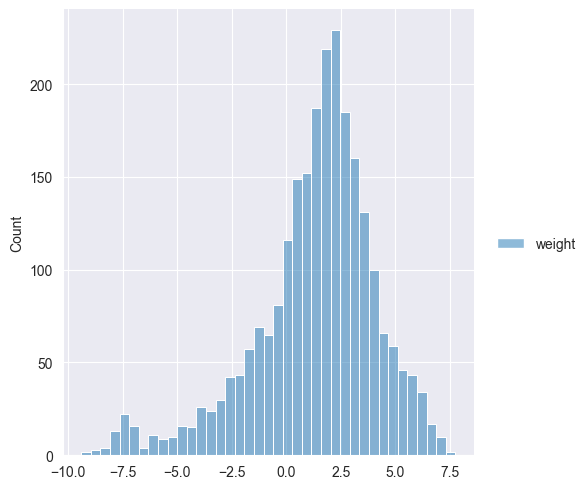

In [31]:
weights = [el[2]['weight'] for el in graphs[4].edges(data=True)]
wdf = pd.DataFrame({'weight': weights})
sns.displot(wdf)

# Test with other months 

In [52]:
months = ['2018-03-31', '2018-04-30', '2018-05-31', '2015-06-30', '2015-07-31']

graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2018-03-31: [('AFG', 'AGO'), ('AFG', 'AUS'), ('AFG', 'AUT'), ('AFG', 'AZE'), ('AFG', 'BGD'), ('AFG', 'BRA'), ('AFG', 'CHE'), ('AFG', 'CHN'), ('AFG', 'CZE'), ('AFG', 'DEU'), ('AFG', 'DNK'), ('AFG', 'EGY'), ('AFG', 'EUR'), ('AFG', 'FRA'), ('AFG', 'GBR'), ('AFG', 'GHA'), ('AFG', 'GRC'), ('AFG', 'HUN'), ('AFG', 'IDN'), ('AFG', 'IND'), ('AFG', 'IRN'), ('AFG', 'ITA'), ('AFG', 'JOR'), ('AFG', 'JPN'), ('AFG', 'KAZ'), ('AFG', 'LUX'), ('AFG', 'MDV'), ('AFG', 'NOR'), ('AFG', 'NZL'), ('AFG', 'PAK'), ('AFG', 'QAT'), ('AFG', 'RUS'), ('AFG', 'SAU'), ('AFG', 'SYR'), ('AFG', 'TUR'), ('AFG', 'USA'), ('AFG', 'UZB'), ('AFG', 'WST'), ('AFR', 'ASA'), ('AFR', 'AUS'), ('AFR', 'AZE'), ('AFR', 'BDI'), ('AFR', 'BEN'), ('AFR', 'CAN'), ('AFR', 'CHE'), ('AFR', 'CHN'), ('AFR', 'COD'), ('AFR', 'CUB'), ('AFR', 'CYP'), ('AFR', 'DEU'), ('AFR', 'DJI'), ('AFR', 'DZA'), ('AFR', 'EAF'), ('AFR', 'EGY'), ('AFR', 'ESP'), ('AFR', 'ETH'), ('AFR', 'EUR'), ('AFR', 'FRA'), ('AFR', 'GBR'), ('AFR', 'GHA'), ('AFR', 'GMB'), ('AFR',

In [53]:
w_length, n_walks = 5, 20
# we are using the same seed for reproducibility
j_nv = Node2Vec(graphs[0], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
j_model = j_nv.fit(window=10, min_count=1, batch_words=4)
f_nv = Node2Vec(graphs[1], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
f_model = f_nv.fit(window=10, min_count=1, batch_words=4)
m_nv = Node2Vec(graphs[2], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
m_model = m_nv.fit(window=10, min_count=1, batch_words=4)
a_nv = Node2Vec(graphs[3], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
a_model = a_nv.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 111.45it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 145.32it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 103.07it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 94.62it/s] 


In [54]:
n_vecs = [j_nv, f_nv, m_nv, a_nv]
nv_models = [j_model, f_model, m_model, a_model]
nodes = graphs[0].nodes
nodes_enc = {node: idx for idx, node in enumerate(nodes)}
counts = count_occurences(n_vecs, nodes, nodes_enc)
averaged_counts = average_counts(counts, nodes_enc)
for node in nodes_enc:
    month_lists = [month[nodes_enc[node]] for month in counts.values()]
    averaged_counts[node] = np.mean(month_lists, axis=0)

In [55]:
dot_products_per_month_weighted = dict()
for i, model in enumerate(nv_models):
    vectors = dict()
    for node in nodes:
        vectors[node] = model.wv[node]
    dot_products = dict()
    for node1 in vectors:
        for node2 in vectors:
            if node1 != node2:
                n_sorted = sorted([node1, node2])
                vector1 = np.array(vectors[node1]) * counts[i][nodes_enc[n_sorted[0]]][nodes_enc[n_sorted[1]]]
                vector2 = np.array(vectors[node2]) * counts[i][nodes_enc[n_sorted[1]]][nodes_enc[n_sorted[0]]]
                dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = (np.dot(vector1, vector2))
    dot_products_per_month_weighted[i] = dot_products
predictions = dict()
for pair in dot_products_per_month_weighted[0]:
    prediction = 0
    for month in range(len(nv_models)):
        prediction += dot_products_per_month_weighted[month][pair]
    predictions[pair] = (prediction / len(nv_models))
actual_and_predicted_values = dict()
for edge in graphs[4].edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in predictions:
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] > 0 else 0, predictions[e])
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
df = pd.DataFrame({'actual': actual, 'predicted': predicted})
X_train, X_test, y_train, y_test = train_test_split(df[['predicted']], df['actual'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_ = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions_))
print('Recall: ', recall_score(y_test, predictions_))
print('F1-score: ', f1_score(y_test, predictions_))

Accuracy:  0.753120665742025
Recall:  1.0
F1-score:  0.8591772151898734
